In [1]:
from __future__ import print_function
import readdata
import readmodel
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [2]:
# importing data
x_train, y_train_binary, x_valid, y_valid_binary, x_test, y_test_binary, data_name = readdata.gapv164(tr = 1, val = 1, te = 1)
input_shape = x_train[0,:,:,:].shape
print(f'input shape is : {input_shape}')
num_classes = y_train_binary.shape[1]
print(f'number of classes are : {num_classes}')

loading 1 chunk  out of 1 of training in v1 gaps --- MAX 154
loading 1 chunk out of 1  of validation in v1 gaps --- MAX 7
loading 1 chunk out of 1 of test in v1 gaps --- MAX 26
data name  is: gaps_v1_64
x_train shape: (32000, 64, 64, 3)
32000 train samples
32000 valid samples
32000 test samples
input shape is : (64, 64, 3)
number of classes are : 2


In [3]:
# import the model
model_name = 'model_3' # 'model_1', 'model_2', or model_3
model = readmodel.modelchoose(model_name,input_shape, num_classes)
model.summary()

Transfer_learning_vgg
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16,

In [32]:
epochs = 20
batch_size = 2500
#num_classes = y_train_binary.shape[1]
model_name = 'gaps_model_1.h5'

In [33]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile( loss = 'binary_crossentropy', # loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train_binary,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_valid, y_valid_binary),
              shuffle=True)

Train on 32000 samples, validate on 32000 samples
Epoch 1/20
32000/32000 [==============================] - 30s 950us/sample - loss: 0.2627 - accuracy: 0.9035 - val_loss: 0.4264 - val_accuracy: 0.8144
Epoch 2/20
32000/32000 [==============================] - 30s 932us/sample - loss: 0.2617 - accuracy: 0.9044 - val_loss: 0.4305 - val_accuracy: 0.8100
Epoch 3/20
32000/32000 [==============================] - 30s 933us/sample - loss: 0.2608 - accuracy: 0.9047 - val_loss: 0.4277 - val_accuracy: 0.8124
Epoch 4/20
32000/32000 [==============================] - 30s 935us/sample - loss: 0.2599 - accuracy: 0.9053 - val_loss: 0.4287 - val_accuracy: 0.8113
Epoch 5/20
32000/32000 [==============================] - 30s 938us/sample - loss: 0.2592 - accuracy: 0.9054 - val_loss: 0.4274 - val_accuracy: 0.8122
Epoch 6/20
32000/32000 [==============================] - 30s 938us/sample - loss: 0.2585 - accuracy: 0.9055 - val_loss: 0.4242 - val_accuracy: 0.8145
Epoch 7/20
32000/32000 [====================

In [35]:
# Score trained model.
scores = model.evaluate(x_test, y_test_binary, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

32000/1 - 20s - loss: 0.1517 - accuracy: 0.9604
Test loss: 0.18680257734656333
Test accuracy: 0.9604375


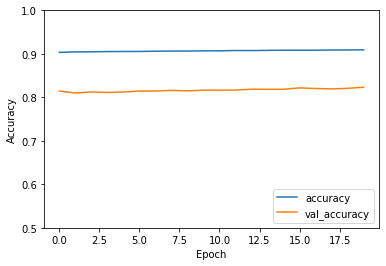

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [37]:
# Save model and weights
os.getcwd()
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ali/my_project/gaps/saved_models/gaps_model_1.h5 
